<a href="https://colab.research.google.com/github/Deepsphere-AI/DSAI_Python_Programming/blob/main/Unit-16/Python%20for%20Deep%20Learning/Program%20336%20-%20CSLAB_DEEP_LEARNING_LOADING_OUR_OWN_TRAINING_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


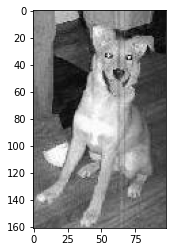

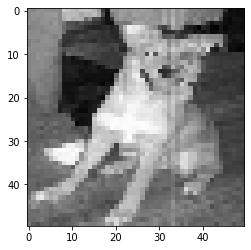

100%|██████████| 61/61 [00:18<00:00,  3.31it/s]

122
1
1
1
1
1
1
1
1
1
1


In [2]:

# /*********************************************************************************************************************
  
#   File Name 	:   CSLAB_DEEP_LEARNING_LOADING_OUR_OWN_TRAINING_DATA
#   Purpose 	:   A Program in Python for Our Own Training Data using Deep Learning
#   Author	:   Deepsphere.ai
#   Reviewer 	:   Jothi Periasamy
#   Date : 25/10/2022
#   Version	:   1.0	
 
# /***********************************************************************************************************************

## Program Description : Program for Our Own Training Data to Deep Learning in Python

## Python Development Environment & Runtime - Python, Anaconda

import numpy as vAR_np
import matplotlib.pyplot as vAR_plt
import cv2
from tqdm import tqdm
import os

vAR_INI_File_Path = os.environ.get('PYTHON_TUTORIAL')

import pandas as vAR_pd

#import configparser

#vAR_Config = configparser.ConfigParser(allow_no_value=True)

#vAR_Config.read(vAR_INI_File_Path)

from google.colab import drive

drive.mount('/content/drive')

vAR_CSLAB_PET_IMAGES = '/content/drive/MyDrive/Semester-4/Deep Learning for Enterprise/Data/Pet_Images'

vAR_CSLAB_DATADIR = vAR_CSLAB_PET_IMAGES

vAR_CSLAB_CATEGORIES = ["Dog", "Cat"]

for vAR_CSLAB_category in vAR_CSLAB_CATEGORIES:  # do dogs and cats
    vAR_CSLAB_path = os.path.join(vAR_CSLAB_DATADIR,vAR_CSLAB_category)  # create path to dogs and cats
    for vAR_CSLAB_img in os.listdir(vAR_CSLAB_path):  # iterate over each image per dogs and cats
        vAR_CSLAB_img_array = cv2.imread(os.path.join(vAR_CSLAB_path,vAR_CSLAB_img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        vAR_plt.imshow(vAR_CSLAB_img_array, cmap='gray')  # graph it
        vAR_plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!
    
vAR_CSLAB_IMG_SIZE = 50

vAR_CSLAB_new_array = cv2.resize(vAR_CSLAB_img_array, (vAR_CSLAB_IMG_SIZE, vAR_CSLAB_IMG_SIZE))

vAR_plt.imshow(vAR_CSLAB_new_array, cmap='gray')

vAR_plt.show()

vAR_CSLAB_training_data = []

def vAR_CSLAB_create_training_data():
    for vAR_CSLAB_category in vAR_CSLAB_CATEGORIES:  # do dogs and cats

        vAR_CSLAB_path = os.path.join(vAR_CSLAB_DATADIR,vAR_CSLAB_category)  # create path to dogs and cats
        vAR_CSLAB_class_num = vAR_CSLAB_CATEGORIES.index(vAR_CSLAB_category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for vAR_CSLAB_img in tqdm(os.listdir(vAR_CSLAB_path)):  # iterate over each image per dogs and cats
            try:
                vAR_CSLAB_img_array = cv2.imread(os.path.join(vAR_CSLAB_path,vAR_CSLAB_img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                vAR_CSLAB_new_array = cv2.resize(vAR_CSLAB_img_array, (vAR_CSLAB_IMG_SIZE, vAR_CSLAB_IMG_SIZE))  # resize to normalize data size
                vAR_CSLAB_training_data.append([vAR_CSLAB_new_array, vAR_CSLAB_class_num])  # add this to our training_data
            except vAR_CSLAB_Exception as vAR_CSLAB_e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

vAR_CSLAB_create_training_data()

print(len(vAR_CSLAB_training_data))

import random

random.shuffle(vAR_CSLAB_training_data)

for vAR_CSLAB_sample in vAR_CSLAB_training_data[:10]:
    print(vAR_CSLAB_sample[1])
    
    vAR_CSLAB_X = []
    vAR_CSLAB_y = []

for vAR_CSLAB_features,vAR_CSLAB_label in vAR_CSLAB_training_data:
    vAR_CSLAB_X.append(vAR_CSLAB_features)
    vAR_CSLAB_y.append(vAR_CSLAB_label)

#print(vAR_CSLAB_X[0].reshape(-1, vAR_CSLAB_IMG_SIZE, vAR_CSLAB_IMG_SIZE, 1))

vAR_CSLAB_X = vAR_np.array(vAR_CSLAB_X).reshape(-1, vAR_CSLAB_IMG_SIZE, vAR_CSLAB_IMG_SIZE, 1)

import pickle

vAR_CSLAB_pickle_out = open("vAR_CSLAB_X.pickle","wb")
pickle.dump(vAR_CSLAB_X, vAR_CSLAB_pickle_out)
vAR_CSLAB_pickle_out.close()

vAR_CSLAB_pickle_out = open("vAR_CSLAB_y.pickle","wb")
pickle.dump(vAR_CSLAB_y, vAR_CSLAB_pickle_out)
vAR_CSLAB_pickle_out.close()


# /****************************************************************************************************************************
#   Disclaimer.

# We are providing this code block strictly for learning and researching, this is not a production
# ready code. We have no liability on this particular code under any circumstances; users should use
# this code on their own risk. All software, hardware and othr products that are referenced in these 
# materials belong to the respective vendor who developed or who owns this product.

# /****************************************************************************************************************************
